In [1]:
import torch
import torchaudio
import torchaudio.functional as F
import torchaudio.transforms as T

print(torch.__version__)
print(torchaudio.__version__)
import numpy as np
import librosa
import matplotlib.pyplot as plt
from IPython.display import Audio
from matplotlib.patches import Rectangle
from torchaudio.utils import download_asset

2.2.0+cu118
2.2.0+cu118


In [32]:
sample_rate

32000

In [33]:
92096 / 32000

2.878

In [2]:
waveform, sample_rate = torchaudio.load(
    "../../data/birdclef-2024/train_audio/aspfly1/XC288095.ogg"
)
transform = torchaudio.transforms.MelSpectrogram(sample_rate)
mel_spectrogram = transform(waveform).numpy()
pseudo_rgb_spectrogram = np.repeat(mel_spectrogram[..., np.newaxis], 3, axis=-1)

/home/lex/miniconda3/lib/python3.11/site-packages/torchaudio/functional/functional.py:584: UserWarning: At least one mel filterbank has all zero values. The value for `n_mels` (128) may be set too high. Or, the value for `n_freqs` (201) may be set too low.
  warnings.warn(


In [3]:
waveform_mono = torch.mean(waveform, dim=0, keepdim=True)

In [4]:
Audio(waveform_mono[0].numpy(), rate=sample_rate)

In [14]:
spectrogram_transforms = []

mel_spectrogram = torchaudio.transforms.MelSpectrogram(
    32000,
    n_mels=128,
    n_fft=2028,
    hop_length=512,
    f_max=16000,
    f_min=20,
)
amplitude_to_db = torchaudio.transforms.AmplitudeToDB(top_db=80)

spectrogram_transforms.append(mel_spectrogram)
spectrogram_transforms.append(amplitude_to_db)

In [15]:
mel_spectrogram

MelSpectrogram(
  (spectrogram): Spectrogram()
  (mel_scale): MelScale()
)

In [9]:
waveform

tensor([[-2.6502e-05, -3.8943e-06,  1.4102e-06,  ..., -7.6963e-06,
          8.7922e-06,  2.1860e-06]])

In [16]:
mel_spectrogram(torch.tensor(waveform))

/tmp/ipykernel_34773/1367998726.py:1: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
  mel_spectrogram(torch.tensor(waveform))


tensor([[[3.1310e-06, 1.0875e-05, 1.6202e+01,  ..., 9.0579e+01,
          3.0737e+01, 3.9262e+00],
         [4.6850e-06, 1.0458e-05, 1.6317e+01,  ..., 1.2661e+02,
          3.9244e+01, 4.4172e+00],
         [9.0956e-06, 2.6560e-05, 1.4520e+01,  ..., 3.2989e+02,
          7.7588e+01, 3.9310e+00],
         ...,
         [5.3836e-06, 1.4553e-05, 7.2749e-03,  ..., 6.8558e-02,
          5.6374e-02, 6.5249e-03],
         [1.4454e-06, 2.6922e-06, 1.5788e-03,  ..., 4.1728e-02,
          1.9261e-02, 2.2144e-03],
         [2.7676e-07, 7.6364e-08, 1.5890e-05,  ..., 5.7326e-03,
          1.8200e-03, 9.4488e-05]]])

In [18]:
a = amplitude_to_db(mel_spectrogram(waveform))

In [19]:
a.shape

torch.Size([1, 128, 205])

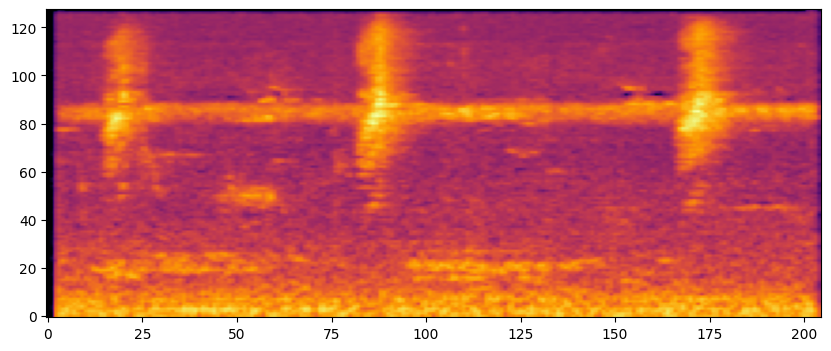

In [17]:
# draw the spectrogram with the transforms
fig, ax = plt.subplots(1, 1, figsize=(10, 4))
ax.imshow(
    amplitude_to_db(mel_spectrogram(waveform)).squeeze().numpy(),
    aspect="auto",
    origin="lower",
    cmap="inferno",
)
plt.show()

In [14]:
waveform[:, int(waveform.shape[1] * 0.1) : waveform.shape[1]]

tensor([[-3.3105e-02,  4.6828e-02,  1.0316e-01,  ..., -7.6963e-06,
          8.7922e-06,  2.1860e-06]])

In [12]:
Audio(waveform[0], rate=sample_rate)

In [27]:
torch.randint(0, 3, (1,)).item()

tensor([1])

In [15]:
duration = len(waveform[0]) / sample_rate

while duration < 5:
    waveform = torch.cat(
        (waveform, waveform[:, int(waveform.shape[1] * 0.1) : waveform.shape[1]]), dim=1
    )
    duration = len(waveform[0]) / sample_rate

In [16]:
Audio(waveform[0], rate=sample_rate)

In [31]:
waveform.shape

torch.Size([1, 92096])

In [23]:
# Define transform
spectrogram = T.Spectrogram(n_fft=512)

# Perform transform
spec = spectrogram(waveform)


melspec = T.AmplitudeToDB()(spec)

In [25]:
plot_spectrogram(melspec, title="spectrogram")

NameError: name 'plot_spectrogram' is not defined

In [49]:
# if len(pseudo_rgb_spectrogram.shape) > 1:  # Handle multi-channel audio if needed
#     pseudo_rgb_spectrogram = librosa.power_to_db(pseudo_rgb_spectrogram, ref=np.max)

In [16]:
pseudo_rgb_spectrogram = pseudo_rgb_spectrogram.squeeze()

In [27]:
pseudo_rgb_spectrogram.shape

(128, 461, 3)

In [28]:
pseudo_rgb_spectrogram = librosa.power_to_db(melspec, ref=np.max)

In [29]:
pseudo_rgb_spectrogram

array([[[-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.],
        ...,
        [-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.],
        [-80., -80., -80., ..., -80., -80., -80.]]], dtype=float32)

TypeError: Invalid shape (1, 257, 360) for image data

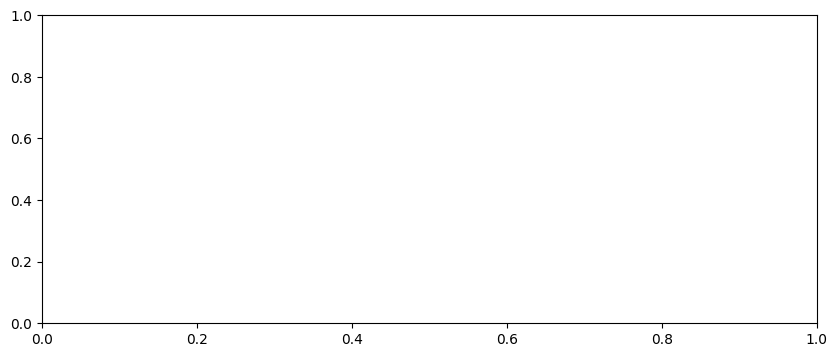

In [30]:
plt.figure(figsize=(10, 4))
plt.imshow(
    pseudo_rgb_spectrogram,
    origin="lower",
    aspect="auto",
    interpolation="nearest",
)  # Use a suitable colormap
# plt.colorbar(label="Amplitude (dB)")
# plt.xlabel("Time")
# plt.ylabel("Mel Frequency")
# plt.title("Mel Spectrogram")
# plt.tight_layout()
plt.show()

In [7]:
n_fft = 2028
hop_length = 512
n_mels = 128
waveform, sample_rate = torchaudio.load(
    "../../data/birdclef-2024/train_audio/bkrfla1/XC116440.ogg"
)


class DataProcessing:
    @staticmethod
    def record_to_frames(waveform, sample_rate, frame_size=5):
        p1d = (1, sample_rate * frame_size)
        out = torch.nn.functional.pad(waveform, p1d, "constant", 0)
        return out.unfold(0, sample_rate * frame_size, sample_rate * frame_size)

    @staticmethod
    def my_collate(batch):
        frames = []
        labels = []
        for data, label in batch:
            waveform, sample_rate, name = data
            l_frames = DataProcessing.record_to_frames(waveform, sample_rate)

            for index in range(l_frames.size()[0]):
                frame = l_frames[index]
                # audio_spectogram = spectogram(frame)
                # audio_spectogram = audio_spectogram.repeat(3, 1, 1)
                frames.append((frame, sample_rate, f"{name}_{index}"))
                labels.append(label)
        return [frames, labels]

    @staticmethod
    def melgram(audio, sample_rate, to_file):
        # librosa.power_to_db(specgram),
        # origin="lower",
        # aspect="auto",
        # interpolation="nearest",
        plt.figure(figsize=(4, 2))
        plt.axis("off")  # no axis
        plt.axes(
            [0.0, 0.0, 1.0, 1.0], frameon=False, xticks=[], yticks=[]
        )  # Remove the white edge
        melspectrogram = librosa.feature.melspectrogram(
            y=audio, sr=sample_rate, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels
        )
        plt.imshow(
            librosa.power_to_db(melspectrogram, ref=np.max),
            origin="lower",
            aspect="auto",
            interpolation="nearest",  # prevent blurring
        )
        # librosa.display.specshow(
        #     librosa.power_to_db(
        #         melspectrogram,
        #         ref=np.max,
        #     ),
        #     # origin="lower",
        #     # aspect="auto",
        #     # interpolation="nearest",
        # )
        plt.savefig(to_file, bbox_inches=None, pad_inches=0)
        plt.close()

In [8]:
DataProcessing.melgram(
    waveform[0].numpy(), sample_rate, f"{n_fft}_{hop_length}_{n_mels}.png"
)